<a href="https://colab.research.google.com/github/amrutha-m-sajeev/Machine-learning-using-Navie-Bayes-Algorithm/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [2]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [4]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [5]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [10]:
x=df.iloc[:,:-1].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]])

In [14]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
x.ndim

2

In [15]:
y.ndim

1

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[1.374e+01, 1.791e+01, 8.812e+01, 5.850e+02, 7.944e-02],
       [1.337e+01, 1.639e+01, 8.610e+01, 5.535e+02, 7.115e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, 6.561e+02, 1.031e-01],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, 6.326e+02, 6.429e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, 5.995e+02, 1.060e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, 4.587e+02, 8.013e-02]])

In [17]:
x_test

array([[1.247e+01, 1.860e+01, 8.109e+01, 4.819e+02, 9.965e-02],
       [1.894e+01, 2.131e+01, 1.236e+02, 1.130e+03, 9.009e-02],
       [1.546e+01, 1.948e+01, 1.017e+02, 7.489e+02, 1.092e-01],
       [1.240e+01, 1.768e+01, 8.147e+01, 4.678e+02, 1.054e-01],
       [1.154e+01, 1.444e+01, 7.465e+01, 4.029e+02, 9.984e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [2.201e+01, 2.190e+01, 1.472e+02, 1.482e+03, 1.063e-01],
       [1.757e+01, 1.505e+01, 1.150e+02, 9.551e+02, 9.847e-02],
       [1.334e+01, 1.586e+01, 8.649e+01, 5.200e+02, 1.078e-01],
       [1.390e+01, 1.662e+01, 8.897e+01, 5.994e+02, 6.828e-02],
       [1.321e+01, 2.525e+01, 8.410e+01, 5.379e+02, 8.791e-02],
       [1.678e+01, 1.880e+01, 1.093e+02, 8.863e+02, 8.865e-02],
       [1.497e+01, 1.976e+01, 9.550e+01, 6.902e+02, 8.421e-02],
       [1.626e+01, 2.188e+01, 1.075e+02, 8.268e+02, 1.165e-01],
       [1.234e+01, 1.227e+01, 7.894e+01, 4.685e+02, 9.003e-02],
       [1.910e+01, 2.629e+01, 1.291e+02,

In [18]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [19]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[-0.12348985, -0.29680142, -0.17050713, -0.20861569, -1.2016799 ],
       [-0.22826757, -0.65795149, -0.25377521, -0.2965028 , -1.80463697],
       [ 0.14553402, -1.23056444,  0.24583328, -0.01024193,  0.5191843 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, -0.0758085 , -2.30358576],
       [-0.05552593,  0.10949242, -0.04684166, -0.16815972,  0.73011017],
       [-0.56525537,  0.32333128, -0.619825  , -0.56100116, -1.15149409]])

In [22]:
x_test

array([[-4.41808719e-01, -2.21638929e-01, -4.20044812e-01,
        -4.82547685e-01,  1.60796304e-01],
       [ 1.40986153e+00,  3.83033719e-01,  1.32877902e+00,
         1.45239726e+00, -4.89952238e-01],
       [ 4.13909062e-01, -2.52876630e-02,  4.27832374e-01,
         3.14598281e-01,  8.10864147e-01],
       [-4.61842246e-01, -4.26915252e-01, -4.04411947e-01,
        -5.24644157e-01,  5.52198409e-01],
       [-7.07968430e-01, -1.14984491e+00, -6.84980720e-01,
        -7.18407353e-01,  1.73729591e-01],
       [ 1.88494230e+00,  2.17250775e+00,  2.00757444e+00,
         1.85544859e+00,  1.39626556e+00],
       [ 2.28847477e+00,  5.14678317e-01,  2.29966216e+00,
         2.50331629e+00,  6.13461347e-01],
       [ 1.01777679e+00, -1.01373778e+00,  9.74982620e-01,
         9.30221870e-01,  8.04737854e-02],
       [-1.92820602e-01, -8.33005369e-01, -1.97893584e-01,
        -3.68797642e-01,  7.15566244e-01],
       [-3.25523888e-02, -6.63429276e-01, -9.58685756e-02,
        -1.31743748e-01

In [23]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [24]:
pred=model.predict(scaler.transform([[17.8,10.4,122,1340,0.1185]]))
print(pred)

[0]


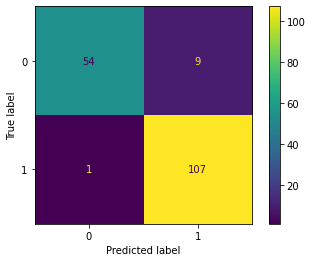

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [27]:
result

array([[ 54,   9],
       [  1, 107]])

In [28]:
score=accuracy_score(y_test,y_pred)
score

0.9415204678362573